# Análisis Visual del Negocio - Airbnb NYC

Este notebook se conecta a las tablas pre-procesadas en la capa `business_layer` de nuestro Data Warehouse en Google BigQuery para visualizar las respuestas a las preguntas de negocio clave.

## 1. Configuración e Importación de Librerías

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

# --- Configuración del Proyecto ---"
GCP_PROJECT_ID = "eng-name-468100-g3"
CREDENTIALS_PATH = 'gcp_credentials.json'

# --- Configuración de Estilo para los Gráficos ---"
sns.set_theme(style="whitegrid")
plt.style.use('seaborn-v0_8-talk')

# --- Autenticación con Google Cloud ---"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = CREDENTIALS_PATH
client = bigquery.Client(project=GCP_PROJECT_ID)

## 2. ¿Cuál es el precio promedio por barrio y distrito?

c:\Users\samla\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


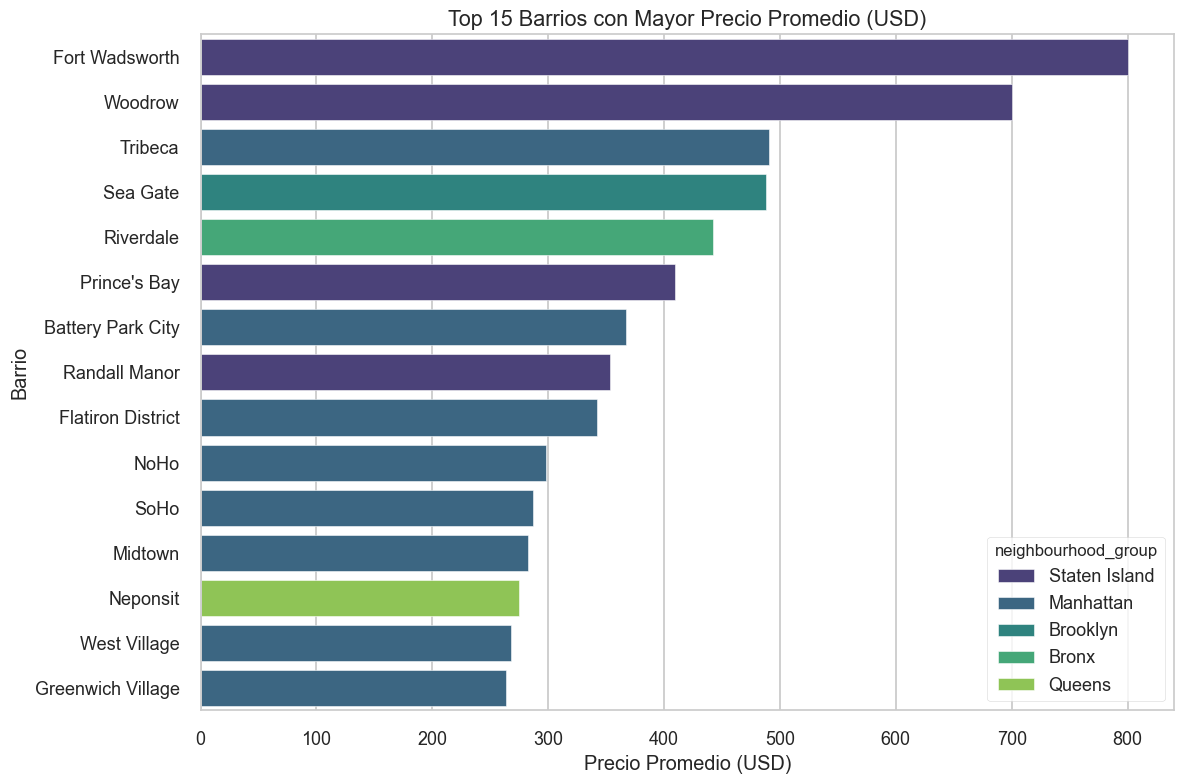

Datos de los 5 barrios más caros:


,neighbourhood_group,neighbourhood,total_listings,avg_price_usd,avg_price_ars
0,Staten Island,Fort Wadsworth,1,800.000000,1.073600e+06
1,Staten Island,Woodrow,1,700.000000,9.394000e+05
2,Manhattan,Tribeca,177,490.638418,6.584368e+05
3,Brooklyn,Sea Gate,7,487.857143,6.547043e+05
4,Bronx,Riverdale,11,442.090909,5.932860e+05


In [2]:
query_avg_price = f"""
    SELECT * 
    FROM `{GCP_PROJECT_ID}.business_layer.avg_price_by_neighbourhood`
    ORDER BY avg_price_usd DESC
    LIMIT 15
"""

df_avg_price = client.query(query_avg_price).to_dataframe()

plt.figure(figsize=(12, 8))
sns.barplot(x='avg_price_usd', y='neighbourhood', data=df_avg_price, palette='viridis', hue='neighbourhood_group', dodge=False)
plt.title('Top 15 Barrios con Mayor Precio Promedio (USD)')
plt.xlabel('Precio Promedio (USD)')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

print("Datos de los 5 barrios más caros:")
display(df_avg_price.head())

**Análisis:** Claramente, Manhattan domina los precios más altos, con barrios como Tribeca y el Distrito Financiero a la cabeza. Esto confirma la percepción de que es el distrito más caro para alojarse.

## 3. ¿Qué tipo de habitación es el más ofrecido y cuál genera mayor revenue?

c:\Users\samla\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
C:\Users\samla\AppData\Local\Temp\ipykernel_4188\3374699719.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='room_type', y='total_listings', data=df_room_type, palette='magma')
C:\Users\samla\AppData\Local\Temp\ipykernel_4188\3374699719.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='room_type', y='estimated_revenue_usd', data=df_room_type, palette='plasma')


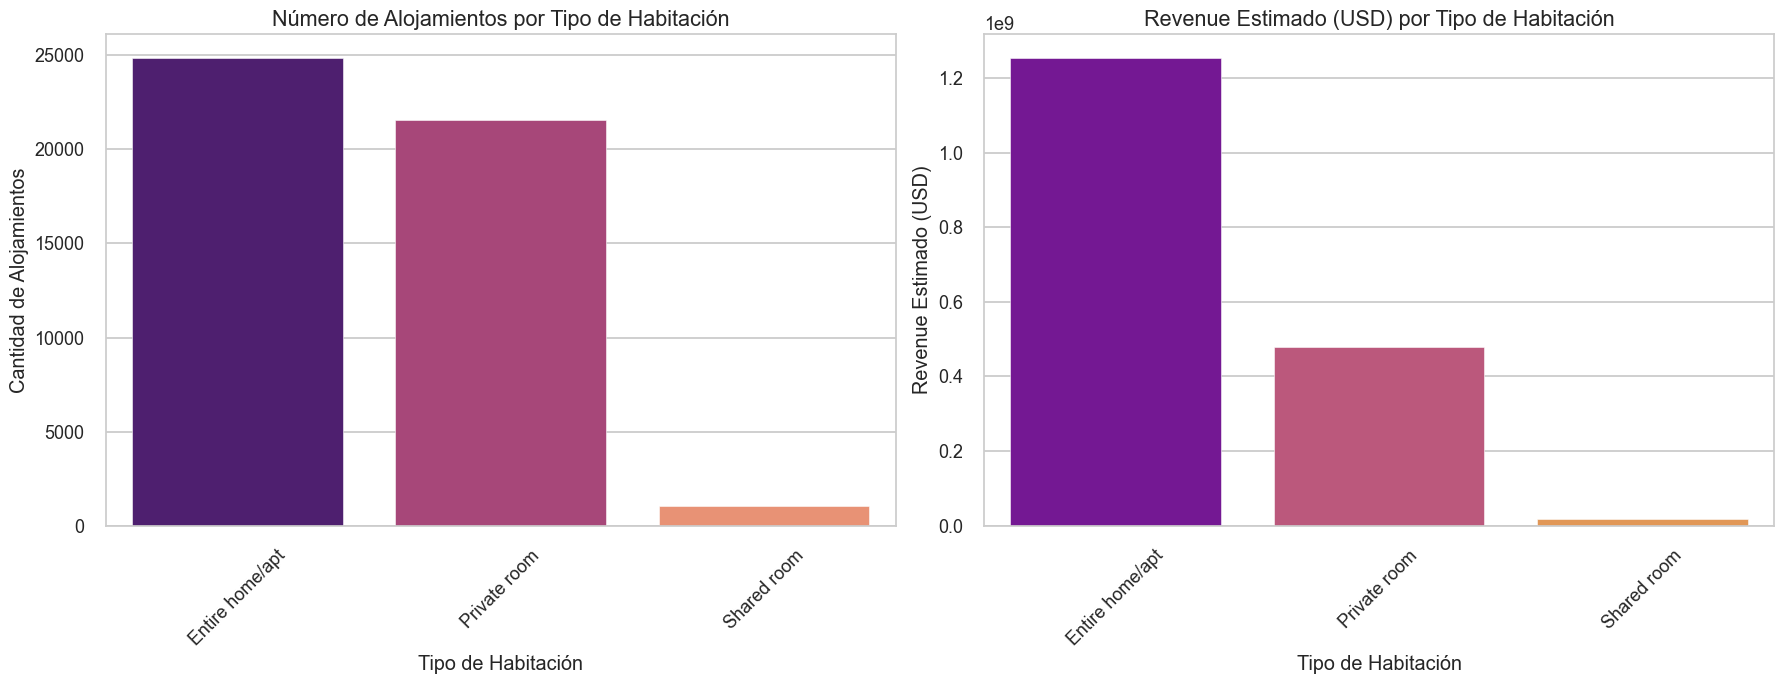

Datos del análisis por tipo de habitación:


,room_type,total_listings,estimated_revenue_usd,estimated_revenue_ars
0,Entire home/apt,24863,1.253764e+09,1.682551e+12
1,Private room,21549,4.790263e+08,6.428534e+11
2,Shared room,1027,1.821954e+07,2.445062e+10


In [4]:
query_room_type = f"""
    SELECT * 
    FROM `{GCP_PROJECT_ID}.business_layer.room_type_analysis`
"""
df_room_type = client.query(query_room_type).to_dataframe()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico de Total de Listados
sns.barplot(ax=axes[0], x='room_type', y='total_listings', data=df_room_type, palette='magma')
axes[0].set_title('Número de Alojamientos por Tipo de Habitación')
axes[0].set_xlabel('Tipo de Habitación')
axes[0].set_ylabel('Cantidad de Alojamientos')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de Revenue Estimado
sns.barplot(ax=axes[1], x='room_type', y='estimated_revenue_usd', data=df_room_type, palette='plasma')
axes[1].set_title('Revenue Estimado (USD) por Tipo de Habitación')
axes[1].set_xlabel('Tipo de Habitación')
axes[1].set_ylabel('Revenue Estimado (USD)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Datos del análisis por tipo de habitación:")
display(df_room_type)


**Análisis:** Aunque los 'Apartamentos/Casas Enteras' y las 'Habitaciones Privadas' tienen una cantidad similar de listados, los apartamentos enteros generan un revenue estimado significativamente mayor. Esto indica que son más caros o tienen una mayor tasa de ocupación.

## 4. ¿Cuáles son los anfitriones con más propiedades?

In [5]:
query_top_hosts = f"""
    SELECT host_id, host_name, total_listings, avg_price_usd
    FROM `{GCP_PROJECT_ID}.business_layer.top_hosts_analysis`
    ORDER BY total_listings DESC
"""
df_top_hosts = client.query(query_top_hosts).to_dataframe()

print("Top 20 Anfitriones con más Propiedades Listadas:")
display(df_top_hosts)


c:\Users\samla\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Top 20 Anfitriones con más Propiedades Listadas:


,host_id,host_name,total_listings,avg_price_usd
0,219517861,Sonder (NYC),106929,253.195719
1,107434423,Blueground,53824,303.150862
2,30283594,Kara,14641,277.528926
3,137358866,Kazuya,10609,43.825243
4,12243051,Sonder,9216,213.031250
5,16098958,Jeremy & Laura,9216,208.958333
6,61391963,Corporate Housing,8281,146.241758
7,22541573,Ken,7569,215.436782
8,200380610,Pranjal,4225,290.230769
9,1475015,Mike,2704,103.076923


**Análisis:** La tabla revela que el mercado no está atomizado, sino que existen 'power users' o empresas (como Sonder, Blueground) que gestionan cientos de propiedades, operando a una escala muy diferente a la de un anfitrión individual.

## 5. ¿Cómo ha sido la evolución de reseñas por mes?

c:\Users\samla\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


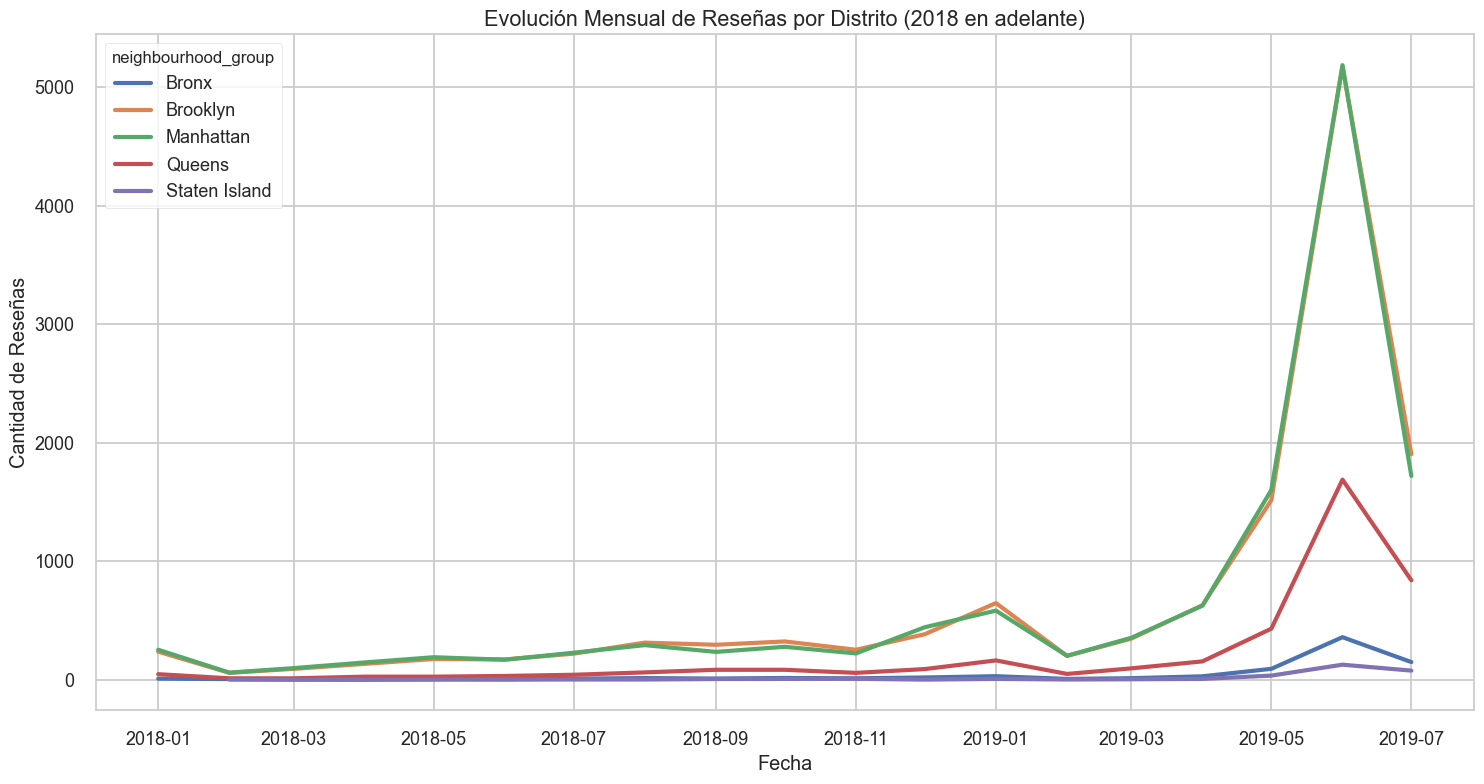

In [8]:
query_reviews = f"""
    SELECT * 
    FROM `{GCP_PROJECT_ID}.business_layer.reviews_evolution_by_month`
    WHERE review_year > 2017 -- Filtramos para ver tendencias más recientes
"""
df_reviews = client.query(query_reviews).to_dataframe()

# Creamos una columna de fecha para graficar correctamente
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_year'].astype(str) + '-' + df_reviews['review_month'].astype(str) + '-01')

plt.figure(figsize=(15, 8))
sns.lineplot(x='review_date', y='total_reviews', hue='neighbourhood_group', data=df_reviews, lw=3)
plt.title('Evolución Mensual de Reseñas por Distrito (2018 en adelante)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Reseñas')
plt.tight_layout()
plt.show()


**Análisis:** El gráfico muestra un crecimiento constante en el número de reseñas hasta mediados de 2019, lo que sugiere un mercado en auge. Brooklyn y Manhattan son claramente los líderes en actividad. Se observa la estacionalidad típica, con picos en los meses de verano.